Working file for Goup Project 

Data
-   https://www.fao.org/faostat/en/#data/QCL
-   https://data.worldbank.org/
-   https://data.worldbank.org/indicator/AG.LND.PRCP.MM?end=2019&start=2019&view=map

Importing all libarys 

In [31]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot


1. Dataset

Import

In [32]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')

Cleaning

In [33]:
df2 = df.dropna(how = 'any') # removing all missing data 
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. Big loss of information!! 
df2 = pd.melt(df2, id_vars=['Area', "Item", "Element", "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})
df2

,Area,Item,Element,Unit,Year,yield_amound
0,Afghanistan,Apples,Area harvested,ha,1961,2220.00
1,Afghanistan,Apples,Yield,hg/ha,1961,68018.00
2,Afghanistan,Apples,Production,tonnes,1961,15100.00
3,Afghanistan,Apricots,Area harvested,ha,1961,4820.00
4,Afghanistan,Apricots,Yield,hg/ha,1961,66390.00
...,...,...,...,...,...,...
1772777,Zimbabwe,Sugar Crops Primary,Yield,hg/ha,2021,734043.00
1772778,Zimbabwe,Sugar Crops Primary,Production,tonnes,2021,3450000.00
1772779,Zimbabwe,Vegetables Primary,Area harvested,ha,2021,35148.00
1772780,Zimbabwe,Vegetables Primary,Yield,hg/ha,2021,66770.00


2. Dataset 

Import

In [34]:
dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')

Cleaning

In [35]:
dr2 = dr.dropna(how = 'any') # removing all missing data 
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})

3. Dataset 

Import

In [36]:
di = pd.read_csv("data/temp.csv", encoding='latin-1')

Cleaning

In [37]:
di2 = di.dropna(how = 'any') # removing all missing data 
di2 = di2.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 
di2

,Year,Area,avg_temp
0,1849,CÃ´te D'Ivoire,25.58
1,1850,CÃ´te D'Ivoire,25.52
2,1851,CÃ´te D'Ivoire,25.67
7,1856,CÃ´te D'Ivoire,26.28
8,1857,CÃ´te D'Ivoire,25.17
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


4. Dataset

Import

In [38]:
dk = pd.read_csv("data/2019 2020.csv", encoding='latin-1')

Cleaning

In [39]:
dk2 = dk.dropna(how = 'any') # removing all missing data
dk2

,ï»¿Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0


Merge the Datasets 

In [40]:
merged = pd.merge(df2, dr2, on= ["Area", "Year"])
merged = pd.merge(di2, merged, on= ["Area", "Year"])
merged

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
0,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
2,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
3,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
4,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


Data exploration 

In [41]:
merged.groupby('Item_x',sort=True)['yield_amound'].sum().nlargest(10)

Item_x
Cereals, primary                               9.297335e+12
Meat of pig with the bone, fresh or chilled    5.465501e+12
Sugar Crops Primary                            5.340561e+12
Sugar cane                                     5.102225e+12
Sheep and Goats                                4.961783e+12
Cattle and Buffaloes                           4.908583e+12
Swine / pigs                                   4.256771e+12
Rice                                           4.077630e+12
Vegetables Primary                             3.928121e+12
Cattle                                         3.612434e+12
Name: yield_amound, dtype: float64

In [42]:
merged.groupby(['Area'],sort=True)['yield_amound'].sum().nlargest(10)

Area
China        4.942422e+13
India        3.664260e+13
Brazil       3.937322e+12
Pakistan     1.739168e+12
Germany      1.001453e+12
Indonesia    5.081216e+11
Australia    4.572027e+11
Japan        4.570322e+11
Italy        3.929370e+11
Mexico       3.678594e+11
Name: yield_amound, dtype: float64

In [43]:
merged.describe()

,Year,avg_temp,yield_amound,pesticide_amound
count,1.589302e+07,1.589302e+07,1.589302e+07,1.589302e+07
mean,2.001206e+03,1.962269e+01,6.218698e+06,1.414622e+04
std,6.787649e+00,6.921072e+00,3.210777e+07,4.090813e+04
min,1.990000e+03,-3.370000e+00,0.000000e+00,0.000000e+00
25%,1.995000e+03,1.523000e+01,1.342900e+04,3.657000e+01
50%,2.001000e+03,2.104000e+01,1.096900e+05,7.427100e+02
75%,2.007000e+03,2.592000e+01,8.300000e+05,6.763400e+03
max,2.013000e+03,3.042000e+01,7.680904e+08,3.677780e+05


In [44]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15893015 entries, 0 to 15893014
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Year              int64  
 1   Area              object 
 2   avg_temp          float64
 3   Item_x            object 
 4   Element_x         object 
 5   Unit_x            object 
 6   yield_amound      float64
 7   Domain            object 
 8   Element_y         object 
 9   Item_y            object 
 10  Unit_y            object 
 11  pesticide_amound  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ GB


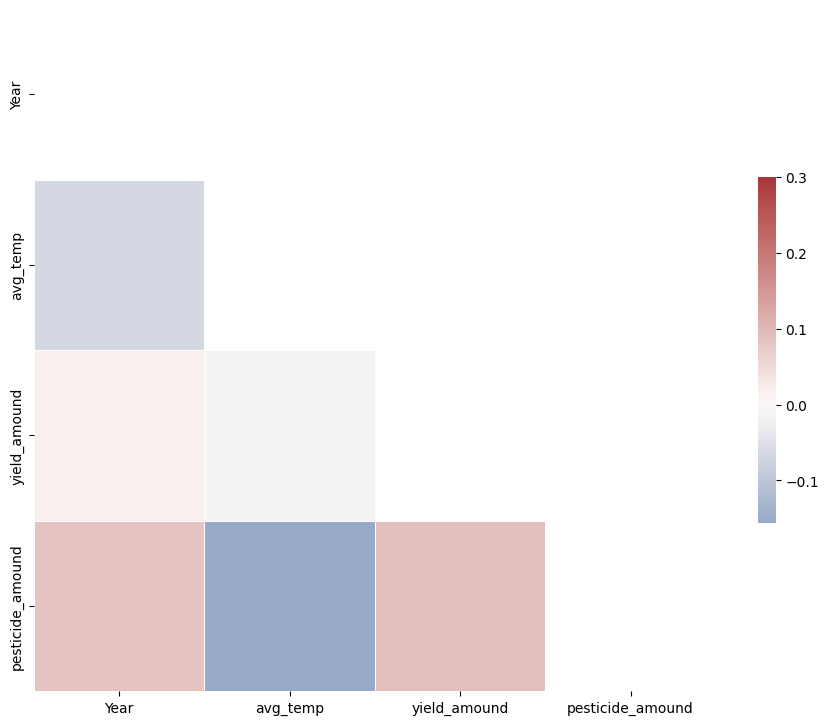

In [45]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
correlation_data=merged.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


No significant correlation 

In [46]:
merged_cereal = merged[merged["Item_x"]== "Cereals, primary"]
merged_cereal = merged_cereal[merged_cereal["Unit_x"] == "tonnes"]

In [47]:
merged_cereal

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
1112,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1113,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
1114,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
1115,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
1116,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15892848,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15892849,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15892850,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15892851,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


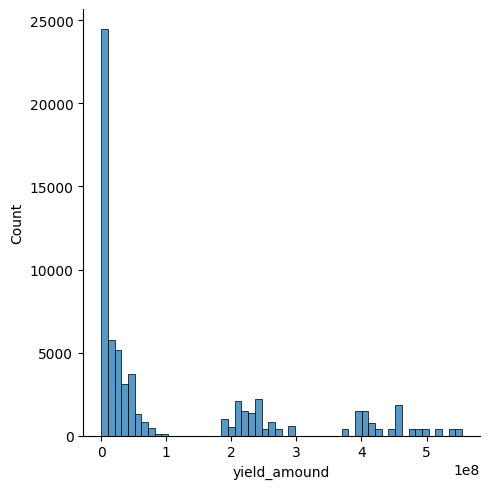

In [48]:
sns.displot(merged_cereal['yield_amound'])

bad distribution. Probably because of the huge amound of categories 

<Axes: xlabel='Year', ylabel='yield_amound'>

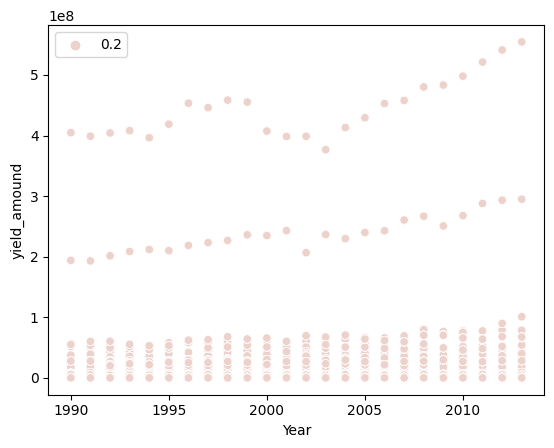

In [49]:
#sns.scatterplot(data=merged_cereal, x= "Year", y= "yield_amound", hue= 0.2)

fuck!!

In [50]:
merged_cereal

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
1112,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1113,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
1114,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
1115,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
1116,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15892848,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15892849,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15892850,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15892851,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


In [53]:
#merged_cereal= merged_cereal.drop(["avg_temp", "Item_x", "Unit_x", "Domain", "Element_y", "Item_y", "Unit_y", "pesticide_amound"], axis= 1)
merged_cereal_wide = merged_cereal.drop_duplicates(subset=['Area', 'Year'], keep='last')

merged_cereal_wide = merged_cereal_wide.pivot(index= "Year",columns= "Area",values= "yield_amound")
# (index='Country',columns='Year',values='Value')  
merged_cereal_wide

Area,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Botswana,Brazil,...,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Tunisia,Uganda,Uruguay,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,897000.00,1627035.00,248500.00,19142700.0,23045332.00,5289752.00,750.00,27746673.0,54430.00,3.249039e+07,...,2578860.0,196284.0,6379500.0,1268000.00,21169497.00,1654847.00,1580000.0,1122627.00,1209431.00,2561741.00
1991,446152.00,3809857.00,372060.00,22838060.0,22682618.00,5044859.00,750.00,28326730.0,52300.00,3.668206e+07,...,2429895.0,229445.0,5160200.0,1273639.00,24462238.00,2575807.87,1576000.0,1073708.00,1222673.76,2069933.00
1992,428918.16,3330382.14,401800.00,25622020.0,19863778.00,4322590.00,500.00,28516927.0,22500.00,4.405799e+07,...,2373882.0,261239.0,3759700.0,1182772.00,23864309.80,2219391.11,1742800.0,1557536.00,608801.00,482169.00
1993,665720.00,1453453.67,322000.00,25568081.0,24099636.00,4206456.00,400.00,28177410.0,46375.59,4.307347e+07,...,2609310.0,217239.0,5241500.0,1252968.00,22017633.80,1939794.77,1880000.0,1491079.00,1756388.00,2566994.00
1994,646026.00,964743.63,285000.00,23789591.0,27487013.00,4435935.00,312.00,26325480.0,55405.27,4.584533e+07,...,2722454.0,218321.0,4471600.0,1213740.00,25347074.00,679200.00,1936000.0,1514886.00,1187964.00,2563155.45
1995,645400.00,2139705.48,296000.00,26281514.0,15699410.00,4451882.00,312.00,27704115.0,62769.17,4.964182e+07,...,2850089.0,216323.0,4791000.0,1245612.00,26413003.88,647471.25,2030000.0,1810677.00,870488.00,1029453.00
1996,503714.00,4901677.89,519375.76,24089764.0,27591195.00,4494851.92,312.00,29620075.0,89530.31,4.243696e+07,...,2098777.0,228817.0,5954200.0,1317471.00,27143793.40,2896345.29,1588000.0,2221641.00,1572874.00,2521121.80
1997,602043.00,870017.00,448888.12,36698490.0,35990811.30,5010607.17,348.00,29673515.0,43946.35,4.487482e+07,...,2268861.0,213192.0,5986000.0,1194083.00,27617108.68,1084468.01,1625000.0,2057040.00,1137129.00,1967739.70
1998,605746.00,3026097.49,609612.00,40418872.0,30711400.00,4772664.73,377.00,31577495.0,14934.00,4.074202e+07,...,2730821.0,188520.0,5618400.0,1240975.00,27814014.05,1697420.00,2085000.0,1960858.00,797593.00,1557967.00


<Axes: xlabel='Year'>

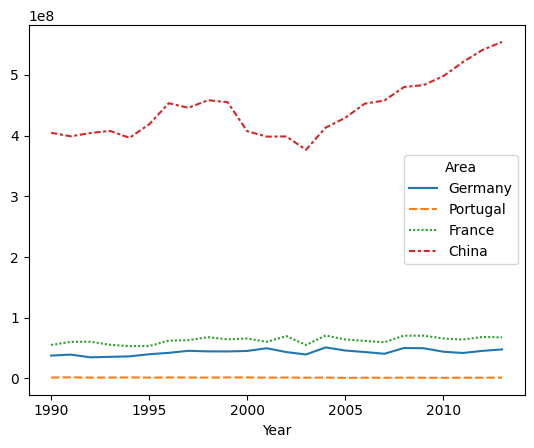

In [58]:
sns.lineplot(data=merged_cereal_wide[["Germany", "Portugal", "France", "China"]])

should acompanied by an graph showing the increase by percent. Small producers might grow a lot.                     
-   to archive that: divide by first year 

too many contrys are shown-- 5 should be selected for a clear graph 

<Axes: xlabel='Year'>

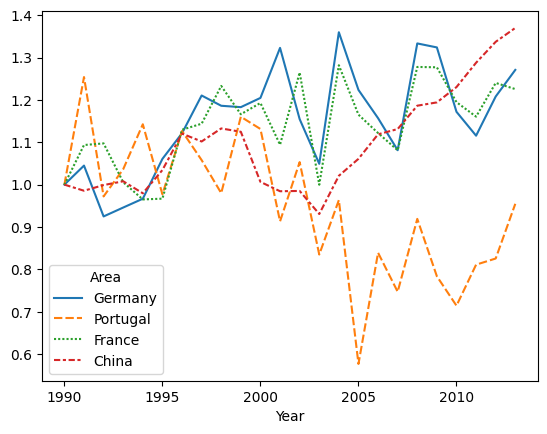

In [62]:
merged_cereal_wide_div = merged_cereal_wide.div(merged_cereal_wide.iloc[0])

sns.lineplot(data = merged_cereal_wide_div[["Germany", "Portugal", "France", "China"]])

better as collums (for one relevant contry (for storyline))